## Example: Large Language Model [Aghajanyan et al. 2021]

In [9]:
from inferential_analysis import InferentialAnalysis
import pandas as pd #needed for data reading & wrangling
import numpy as np #needed for data reading & wrangling

### Training Reproducibility: Statistical Significance Testing of Best Baseline vs Best Competitor  

In [10]:
eval_data = pd.read_csv('evaluation_data/aghajanyan_cnn-best.csv', low_memory = False)
eval_data = eval_data.astype({"summary_id" : 'category', "system" : 'category'})

In [11]:
my_analysis = InferentialAnalysis(evaluation_data = eval_data, eval_metric_col = "rouge_2", system_col = "system", input_identifier_col = "summary_id")

In [12]:
my_analysis.system_comparison()

Fitting H0-model.
Fitting H1-model.
GLRT p-value <= alpha: Null hypothesis can be rejected! At least two systems are different. See contrasts for pairwise comparisons.


In [13]:
my_analysis.SystemComparison.glrt

{'chi_square': 37.020413786842255, 'df': 1, 'p': 1.1689894607869178e-09}

In [14]:
my_analysis.SystemComparison.means

,system,Estimate,95CI_lo,95CI_up,SE
0,Baseline,0.213,0.210,0.215,0.001
1,SOTA,0.217,0.215,0.220,0.001


In [15]:
my_analysis.SystemComparison.contrasts

,Contrast,Estimate,95CI_lo,95CI_up,SE,P-val,Effect_size_g
0,Baseline - SOTA,-0.005,-0.006,-0.003,0.001,0.0,-0.088419


#### Investigate if the observed performance difference depends on the **word rarity** score of the input summary

In [16]:
my_analysis.conditional_system_comparison(data_prop_col = "word_rarity")

Data property is a numeric variable. Applying indivdual trends model and reporting slopes.
Fitting H0-model.
Fitting H1-model.
GLRT p-value <= alpha: Null hypothesis can be rejected! At least two systems depend differently to the data property. See contrasts for pairwise comparisons.


In [17]:
my_analysis.ConditionalSystemComparison.glrt

{'chi_square': 4.463576956077304, 'df': 1, 'p': 0.034624919652044395}

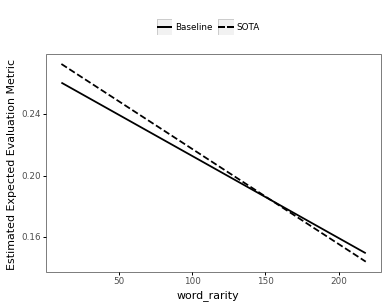

<ggplot: (8770776289061)>

In [18]:
my_analysis.ConditionalSystemComparison.interaction_plot

In [19]:
my_analysis.ConditionalSystemComparison.slopes

,system,Estimate,95CI_lo,95CI_up,SE
0,Baseline,-0.001,-0.001,-0.0,0.0
1,SOTA,-0.001,-0.001,-0.0,0.0


In [21]:
my_analysis.ConditionalSystemComparison.contrasts

,Contrast,Estimate,95CI_lo,95CI_up,SE,P-val
0,Baseline - SOTA,0.0,0.0,0.0,0.0,0.035


In [23]:
my_analysis.ConditionalSystemComparison.data_property

'word_rarity'

#### Investigate If the Observed Performance Difference Depends on the **flesch-kincaid** Score of the Input Summary

In [24]:
my_analysis.conditional_system_comparison(data_prop_col = "flesch_kincaid", row_filter = "flesch_kincaid >= 0")

Data property is a numeric variable. Applying indivdual trends model and reporting slopes.
Fitting H0-model.
Fitting H1-model.
GLRT p-value <= alpha: Null hypothesis can be rejected! At least two systems depend differently to the data property. See contrasts for pairwise comparisons.


In [25]:
my_analysis.ConditionalSystemComparison.glrt

{'chi_square': 4.303537068510195, 'df': 1, 'p': 0.03803319351110468}

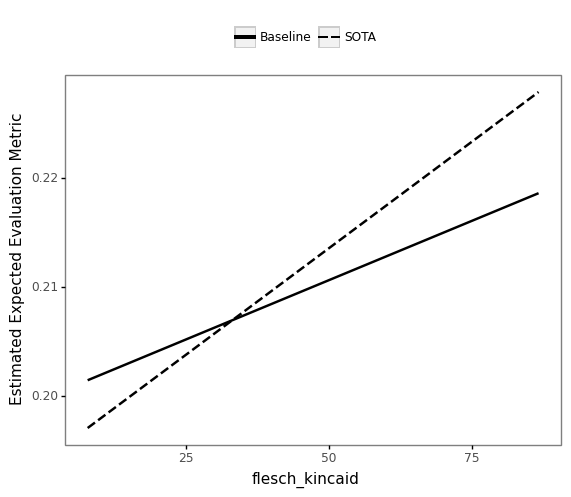

<ggplot: (8770630245693)>

In [26]:
my_analysis.ConditionalSystemComparison.interaction_plot

In [27]:
my_analysis.ConditionalSystemComparison.slopes

,system,Estimate,95CI_lo,95CI_up,SE
0,Baseline,0.0,-0.0,0.000,0.0
1,SOTA,0.0,0.0,0.001,0.0


In [29]:
my_analysis.ConditionalSystemComparison.contrasts

,Contrast,Estimate,95CI_lo,95CI_up,SE,P-val
0,Baseline - SOTA,-0.0,-0.0,-0.0,0.0,0.038


In [30]:
my_analysis.ConditionalSystemComparison.data_property

'flesch_kincaid'

### Inferential Reproducibility: Statistical Significance Testing of Baselines vs Competitors under Meta-Parameter Variation and Reliability

In [54]:
eval_data = pd.read_csv('evaluation_data/aghajanyan_cnn-all.csv', low_memory = False)
eval_data = eval_data.astype({"summary_id" : 'category', "system" : 'category'})

In [55]:
my_analysis = InferentialAnalysis(evaluation_data = eval_data, eval_metric_col = "rouge_2", system_col = "system", input_identifier_col = "summary_id")

In [56]:
my_analysis.system_comparison()

Fitting H0-model.
Fitting H1-model.
GLRT p-value <= alpha: Null hypothesis can be rejected! At least two systems are different. See contrasts for pairwise comparisons.


In [57]:
my_analysis.SystemComparison.glrt

{'chi_square': 11588.40821652161, 'df': 1, 'p': 0.0}

In [58]:
my_analysis.SystemComparison.means

,system,Estimate,95CI_lo,95CI_up,SE
0,Baseline,0.21,0.208,0.212,0.001
1,SOTA,0.19,0.188,0.192,0.001


In [59]:
my_analysis.SystemComparison.contrasts

,Contrast,Estimate,95CI_lo,95CI_up,SE,P-val,Effect_size_g
0,Baseline - SOTA,0.02,0.02,0.021,0.0,0.0,0.294151


In [39]:
my_analysis.icc(algorithm_id = "SOTA", facet_cols = ["seed", "lambda", "distribution"])

Calculating variance decomposition.


In [40]:
my_analysis.Reliability.icc

,Var,ICC
summary_id,0.009916,62.651419
seed,0.000077,0.484492
lambda,0.001318,8.325588
distribution,0.000032,0.200806
Residual,0.004485,28.337695


#### Investigate If the Choice of lambda has a Significant Impact on the System Performance

In [41]:
my_analysis.hyperparameter_assessment(algorithm_id = "SOTA", hyperparameter_col = "lambda")

Fitting H0-model.
Fitting H1-model.
P-values adjusted by tukey method for family of 3 estimates
GLRT p-value <= alpha: Null hypothesis can be rejected! At least two systems are different. See contrasts for pairwise comparisons.


In [42]:
my_analysis.HyperParameterAssessment.glrt

{'chi_square': 60450.516527839005, 'df': 2, 'p': 0.0}

In [43]:
my_analysis.HyperParameterAssessment.means

,lambda,Estimate,95CI_lo,95CI_up,SE
0,0-001,0.209,0.207,0.211,0.001
1,0-01,0.213,0.211,0.215,0.001
2,0-1,0.148,0.146,0.150,0.001


In [44]:
my_analysis.HyperParameterAssessment.contrasts

,Contrast,Estimate,95CI_lo,95CI_up,SE,P-val,Effect_size_g
0,(0-001) - (0-01),-0.004,-0.005,-0.003,0.0,0.0,-0.059202
1,(0-001) - (0-1),0.061,0.060,0.061,0.0,0.0,0.902828
2,(0-01) - (0-1),0.065,0.064,0.065,0.0,0.0,0.962030


In [45]:
my_analysis.HyperParameterAssessment.algorithm

'SOTA'

#### Assess If the Observed Hyper-Parameter Influence is Moderated by the **word rarity** Score of the Input 

In [46]:
my_analysis.conditional_hyperparameter_assessment(algorithm_id = "SOTA", hyperparameter_col = "lambda", data_prop_col = "word_rarity")

Data property is a numeric variable. Applying indivdual trends model and reporting slopes.
Fitting H0-model.
Fitting H1-model.
P-values adjusted by tukey method for family of 3 estimates
GLRT p-value <= alpha: Null hypothesis can be rejected! At least two systems depend differently to the data property. See contrasts for pairwise comparisons.


In [47]:
my_analysis.ConditionalHyperParameterAssessment.glrt

{'chi_square': 428.5751593449386, 'df': 2, 'p': 0.0}

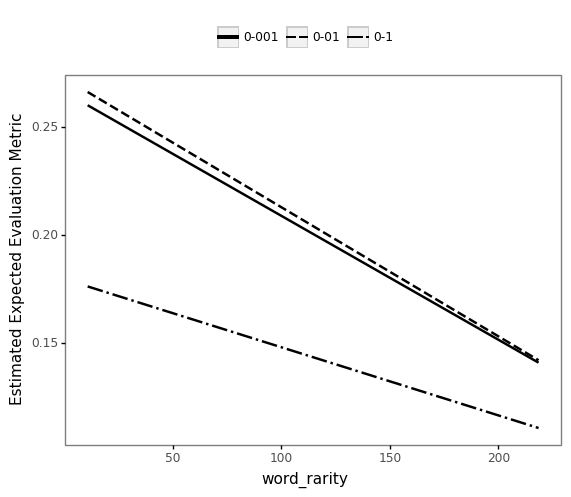

<ggplot: (8770386373898)>

In [48]:
my_analysis.ConditionalHyperParameterAssessment.interaction_plot

In [50]:
my_analysis.ConditionalHyperParameterAssessment.slopes

,lambda,Estimate,95CI_lo,95CI_up,SE
0,0-001,-0.001,-0.001,-0.0,0.0
1,0-01,-0.001,-0.001,-0.0,0.0
2,0-1,-0.000,-0.000,-0.0,0.0


In [51]:
my_analysis.ConditionalHyperParameterAssessment.contrasts

,Contrast,Estimate,95CI_lo,95CI_up,SE,P-val
0,(0-001) - (0-01),0.0,-0.0,0.0,0.0,0.25
1,(0-001) - (0-1),-0.0,-0.0,-0.0,0.0,0.00
2,(0-01) - (0-1),-0.0,-0.0,-0.0,0.0,0.00


In [52]:
my_analysis.ConditionalHyperParameterAssessment.algorithm

'SOTA'

In [53]:
my_analysis.ConditionalHyperParameterAssessment.data_property

'word_rarity'

#### Assess If the Observed Hyper-Parameter Influence is Moderated by the **flesch-kincaid** Score of the Input 

In [60]:
my_analysis.conditional_hyperparameter_assessment(algorithm_id = "SOTA", hyperparameter_col = "lambda", data_prop_col = "flesch_kincaid", row_filter = "flesch_kincaid >= 0")

Data property is a numeric variable. Applying indivdual trends model and reporting slopes.
Fitting H0-model.
Fitting H1-model.
P-values adjusted by tukey method for family of 3 estimates
GLRT p-value <= alpha: Null hypothesis can be rejected! At least two systems depend differently to the data property. See contrasts for pairwise comparisons.


In [61]:
my_analysis.ConditionalHyperParameterAssessment.glrt

{'chi_square': 366.55330215825234, 'df': 2, 'p': 0.0}

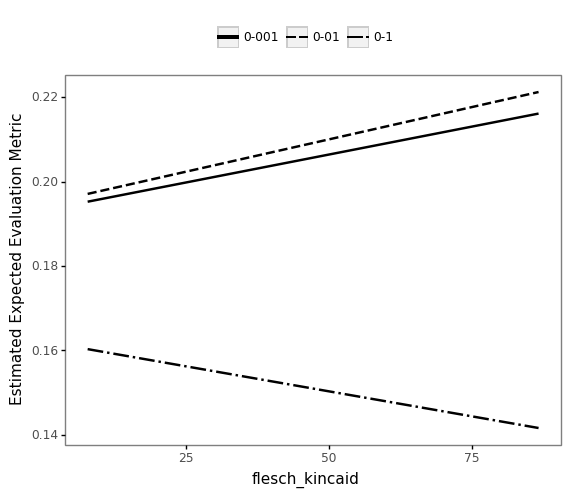

<ggplot: (8770667489139)>

In [62]:
my_analysis.ConditionalHyperParameterAssessment.interaction_plot

In [64]:
my_analysis.ConditionalHyperParameterAssessment.slopes

,lambda,Estimate,95CI_lo,95CI_up,SE
0,0-001,0.0,0.0,0.000,0.0
1,0-01,0.0,0.0,0.001,0.0
2,0-1,-0.0,-0.0,-0.000,0.0


In [65]:
my_analysis.ConditionalHyperParameterAssessment.contrasts

,Contrast,Estimate,95CI_lo,95CI_up,SE,P-val
0,(0-001) - (0-01),-0.000,-0.0,0.000,0.0,0.389
1,(0-001) - (0-1),0.001,0.0,0.001,0.0,0.000
2,(0-01) - (0-1),0.001,0.0,0.001,0.0,0.000


In [66]:
my_analysis.ConditionalHyperParameterAssessment.algorithm

'SOTA'

In [67]:
my_analysis.ConditionalHyperParameterAssessment.data_property

'flesch_kincaid'